In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('questions.csv')
df = df[df.Category != "Other"]

# How many attorneys per state

In [29]:
# Group the data by 'TakenByAttorneyUno' and count the number of unique states each attorney worked in
state_counts = df.groupby('StateAbbr')['TakenByAttorneyUno'].nunique()

# Print the number of attorneys in each state in sorted order
for state, count in state_counts.sort_values().iteritems():
    print(f"{state}: {count} attorneys")


ID: 0 attorneys
KS: 15 attorneys
PA: 18 attorneys
NJ: 19 attorneys
US: 22 attorneys
SD: 22 attorneys
UT: 29 attorneys
VT: 30 attorneys
MI: 31 attorneys
IA: 35 attorneys
NM: 37 attorneys
AK: 39 attorneys
AZ: 39 attorneys
WY: 43 attorneys
HI: 47 attorneys
CT: 50 attorneys
AL: 52 attorneys
MS: 55 attorneys
NH: 71 attorneys
WV: 75 attorneys
OK: 87 attorneys
CA: 95 attorneys
ME: 104 attorneys
LA: 117 attorneys
NE: 121 attorneys
AR: 122 attorneys
MO: 130 attorneys
MD: 133 attorneys
GA: 144 attorneys
WI: 150 attorneys
SC: 161 attorneys
NY: 187 attorneys
VA: 200 attorneys
IN: 250 attorneys
NC: 260 attorneys
MA: 293 attorneys
FL: 369 attorneys
TN: 376 attorneys
TX: 475 attorneys
IL: 533 attorneys


# Separating Attorney Type in Kansas

In [30]:


# Read in the data
df = pd.read_csv('questions.csv')
df = df[df.Category != "Other"]
# Filter for attorneys in Kansas
df_kansas = df

# Calculate total number of attorneys in Kansas
total_attorneys = df_kansas['TakenByAttorneyUno'].nunique()

# Initialize dictionary to store results
attorneys_by_category = {}

# Loop through categories
for category in df['Category'].unique():
    
    # Filter for current category
    df_cat = df_kansas[df_kansas['Category'] == category]
    
    # Calculate number of attorneys in current category
    num_attorneys = df_cat['TakenByAttorneyUno'].nunique()
    
    # Calculate percentage of attorneys in current category
    pct_attorneys = (num_attorneys / total_attorneys) * 100
    
    # Add to dictionary
    attorneys_by_category[f"Attorneys_in_{category}"] = {
        "num_attorneys": num_attorneys,
        "pct_attorneys": pct_attorneys
    }

# Output results
for category, data in attorneys_by_category.items():
    print(f"{category}: {data['num_attorneys']} attorneys ({data['pct_attorneys']:.2f}% of attorneys in Kansas)")


Attorneys_in_Family and Children: 3087 attorneys (65.96% of attorneys in Kansas)
Attorneys_in_Individual Rights: 1073 attorneys (22.93% of attorneys in Kansas)
Attorneys_in_Consumer Financial Questions: 1664 attorneys (35.56% of attorneys in Kansas)
Attorneys_in_Housing and Homelessness: 2148 attorneys (45.90% of attorneys in Kansas)
Attorneys_in_Income Maintenance: 560 attorneys (11.97% of attorneys in Kansas)
Attorneys_in_Health and Disability: 551 attorneys (11.77% of attorneys in Kansas)
Attorneys_in_Work, Employment and Unemployment: 1194 attorneys (25.51% of attorneys in Kansas)
Attorneys_in_Juvenile: 116 attorneys (2.48% of attorneys in Kansas)
Attorneys_in_Education: 229 attorneys (4.89% of attorneys in Kansas)


# Attorneys Distribution in Kansas Graph

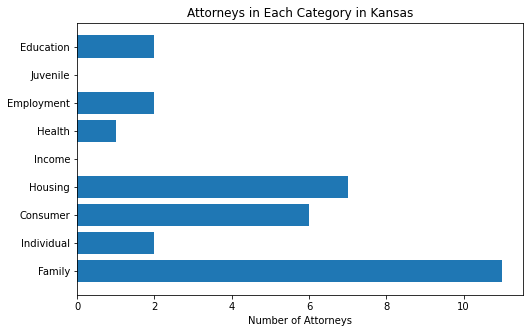

In [32]:
import matplotlib.pyplot as plt

# Define the data
categories = ['Family and Children', 'Individual Rights', 'Consumer Financial Questions', 'Housing and Homelessness', 'Income Maintenance', 'Health and Disability', 'Work, Employment and Unemployment', 'Juvenile', 'Education']
attorneys = [11, 2, 6, 7, 0, 1, 2, 0, 2]
percentages = [73.33, 13.33, 40.00, 46.67, 0.00, 6.67, 13.33, 0.00, 13.33]

# Create a dictionary to map the original category names to the new, one-word names
category_dict = {'Family and Children': 'Family',
                 'Individual Rights': 'Individual',
                 'Consumer Financial Questions': 'Consumer',
                 'Housing and Homelessness': 'Housing',
                 'Income Maintenance': 'Income',
                 'Health and Disability': 'Health',
                 'Work, Employment and Unemployment': 'Employment',
                 'Juvenile': 'Juvenile',
                 'Education': 'Education'}

# Convert the category names and percentages to the new names
new_categories = [category_dict[c] for c in categories]

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 5))
plt.barh(new_categories, attorneys)
plt.xlabel('Number of Attorneys')
plt.title('Attorneys in Each Category in Kansas')
plt.show()


# Comparing Kansas Percentage to National Average

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
categories = ['Juvenile', 'Education', 'Housing ','Family', 'Income', 'Health']
kansas_percentages = [0.0, 13.33, 46.67, 73.33, 0.00, 6.67]
national_average = [2.48,   4.89,45.90, 65.96,  11.97, 11.77]
colors = ['#ff4b5b', '#ff4b5b', '#ff4b5b', '#ff4b5b', '#ff4b5b', '#ff4b5b', '#fcbc04', '#fcbc04', '#fcbc04', '#fcbc04', '#fcbc04', '#fcbc04']

# Create a dictionary to map the original category names to the new, one-word names
category_dict = {'Family': 'Family',
                 'Housing ': 'Housing',
                 'Income': 'Income',
                 'Health': 'Health',
                 'Juvenile': 'Juvenile',
                 'Education': 'Education'}

# Convert the category names and percentages to the new names
new_categories = [category_dict[c] for c in categories]

# Create a vertical bar chart
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(len(new_categories))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, kansas_percentages, bar_width,
                 alpha=opacity,
                 color=colors[0:len(kansas_percentages)],
                 edgecolor='black')

rects2 = plt.bar(index + bar_width, national_average, bar_width,
                 alpha=opacity,
                 color=colors[len(kansas_percentages):],
                 edgecolor='black')

plt.xlabel('', fontsize=20)
plt.ylabel('Percentage of Attorney Supply', fontsize=12)
plt.xticks(index + bar_width/2, new_categories, fontsize=12, rotation=45, ha='right')
plt.legend((rects1[0], rects2[0]), ('Kansas', 'National Average'), loc='center right', fontsize=10)

plt.show()


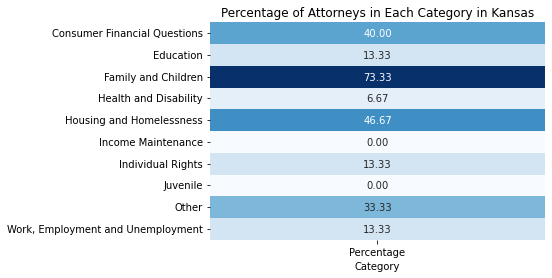

In [4]:
# Load the data
questions = pd.read_csv('questions.csv')


# Filter for attorneys in Kansas
kansas_attorneys = questions[questions['StateAbbr'] == 'KS']

# Calculate the percentage of each type of attorney
attorneys_by_category = {}
for category in set(kansas_attorneys['Category']):
    category_attorneys = kansas_attorneys[kansas_attorneys['Category'] == category]['TakenByAttorneyUno'].nunique()
    total_attorneys = kansas_attorneys['TakenByAttorneyUno'].nunique()
    percentage = round(category_attorneys / total_attorneys * 100, 2)
    attorneys_by_category[category] = percentage

# Create a dataframe for the heatmap
df1 = pd.DataFrame({'Percentage': attorneys_by_category})

# Plot the heatmap
sns.heatmap(df1, cmap='Blues', annot=True, fmt='.2f', cbar=False)
plt.title('Percentage of Attorneys in Each Category in Kansas')
plt.xlabel('Category')
plt.ylabel('')
plt.show()


# Number of Cases Taken by Attorney

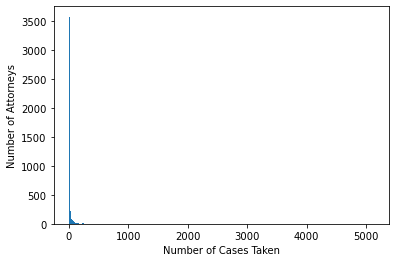

In [33]:
# group the DataFrame by attorney and count the number of messages
grouped = df.groupby('TakenByAttorneyUno')['Category'].count()

attorney_counts = df['TakenByAttorneyUno'].value_counts()
attorneys = attorney_counts[attorney_counts <= 100].index.tolist()
df = df[df['TakenByAttorneyUno'].isin(attorneys)]

# create a bar chart of the number of cases taken by each attorney
plt.hist(grouped, bins=range(0, max(grouped)+10, 10))
plt.xlabel('Number of Cases Taken')
plt.ylabel('Number of Attorneys')
plt.show()

# List of Case Category taken by Attorney

In [ ]:
counts = questions.groupby(["TakenByAttorneyUno", "Category"]).size()

# group the data again by attorney ID and count the total number of questions for each attorney
total_counts = counts.groupby("TakenByAttorneyUno").sum()

# sort the attorneys by their total case count
total_counts = total_counts.sort_values(ascending=False)

for attorney_id in total_counts.index:
    count = total_counts[attorney_id]
    print(f"Attorney {attorney_id} has taken {count} questions in total.")
    
    # print the category counts for this attorney
    attorney_counts = counts.loc[attorney_id]
    if len(attorney_counts) > 0:
        print("Category counts:")
        print(attorney_counts)
    else:
        print("This attorney has not taken any questions.")
    
    print()


# Amt of Attorneys in Kansas

In [ ]:
df_kansas = df[df['StateAbbr'] == 'KS']

# get unique attorney IDs
attorney_ids = df_kansas['TakenByAttorneyUno'].unique()
print(len(attorney_ids))

# List of Case Category taken by Attorney (Kansas)

In [ ]:


# Load the questions dataset
questions = pd.read_csv('questions.csv')
df = df[df.Category != "Other"]
# Isolate only attorneys in Kansas
ks_attorneys = questions.loc[questions['StateAbbr'] == 'KS', 'TakenByAttorneyUno'].unique()

# Loop through each attorney and print their total completed cases and cases by category
for attorney in ks_attorneys:
    attorney_cases = questions.loc[questions['TakenByAttorneyUno'] == attorney]
    total_cases = len(attorney_cases)
    print(f"Attorney {attorney} completed {total_cases} total cases.")
    for category in attorney_cases['Category'].unique():
        category_cases = len(attorney_cases.loc[attorney_cases['Category'] == category])
        print(f"\t{category}: {category_cases} cases.")


# Cases Taken by Attorney

In [34]:
import pandas as pd

# read in the data
questions = pd.read_csv("questions.csv")

# group the data by attorney ID and state, and count the total number of questions for each group
counts = questions.groupby(["TakenByAttorneyUno", "StateAbbr"]).size().reset_index(name="Count")

# sort the data by count in descending order
sorted_counts = counts.sort_values(by=["Count"], ascending=False)

# print out the sorted counts for each attorney and state
for index, row in sorted_counts.iterrows():
    attorney_id = row["TakenByAttorneyUno"]
    state = row["StateAbbr"]
    count = row["Count"]
    print(f"Attorney {attorney_id} from {state} has completed {count} cases.")


Attorney 59C1710C-0D02-4D34-BE10-E87A4D0F315E from FL has completed 5118 cases.
Attorney B68EB95B-020E-48C0-9B8F-D45BC98A27B7 from FL has completed 3925 cases.
Attorney 775743CD-AE89-4866-A5A3-0DDEF53E619F from TN has completed 3288 cases.
Attorney 05DD8A38-5C07-4796-8ED5-699E05424614 from MO has completed 3163 cases.
Attorney EBB7B7CE-7372-4DDF-8135-EB7AD00517F5 from TX has completed 3030 cases.
Attorney 31DD8175-3EA4-45E1-81F2-09DE7A30AB3E from SC has completed 2666 cases.
Attorney 59960B36-F097-4BAB-9B03-F8A70FBD1E6A from WI has completed 1934 cases.
Attorney FA34142B-1575-4720-981C-2D28C3560137 from NC has completed 1890 cases.
Attorney BB6317EC-E805-4F29-BD7B-6CD17A4A65FF from IN has completed 1700 cases.
Attorney EB1EEEC7-AB79-4434-BA83-D77AFE1F1635 from FL has completed 1601 cases.
Attorney BC34BF04-9D4D-4E9B-9669-A4BC66F831CD from IL has completed 1480 cases.
Attorney 34322290-1BBC-42BA-B351-76029E9E6F9D from SC has completed 1286 cases.
Attorney 9C4D3C1A-0E7F-4EB2-8023-680F87F

# Average Cases Taken By Attorney

In [35]:
import pandas as pd

# load the "questions" dataset into a pandas DataFrame
df = pd.read_csv("questions.csv")

# count the number of occurrences of each distinct id
id_counts = df['TakenByAttorneyUno'].value_counts()


# find the average amount each id is shown
avg_count = id_counts.mean()

# print the result
print(avg_count)


28.595115170770452
